<a href="https://colab.research.google.com/github/robinsingh2022/NorthwesternMSDS422/blob/main/ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ingest

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/data/data.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01


In [ ]:
df.columns

Index(['dateRep', 'year_week', 'cases_weekly', 'deaths_weekly',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'notification_rate_per_100000_population_14-days'],
      dtype='object')

In [ ]:
df.tail()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
9786,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11
9787,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9788,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9789,30/03/2020,2020-13,5,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9790,23/03/2020,2020-12,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
df.shape

(9791, 10)

##EDA

In [ ]:
df.describe()

,cases_weekly,deaths_weekly,popData2019,notification_rate_per_100000_population_14-days
count,9.791000e+03,9791.000000,9.769000e+03,9556.000000
mean,9.171902e+03,198.195179,4.043069e+07,77.844643
std,5.562173e+04,926.689829,1.515012e+08,189.287209
min,-3.864000e+03,-875.000000,8.150000e+02,-132.600000
25%,8.000000e+00,0.000000,1.293120e+06,0.810000
50%,1.670000e+02,2.000000,7.169456e+06,7.690000
75%,2.334500e+03,37.000000,2.851583e+07,61.965000
max,1.782792e+06,22852.000000,1.433784e+09,4343.440000


*Scatterplot showing correlation between cases_weekly and deaths_weekly*

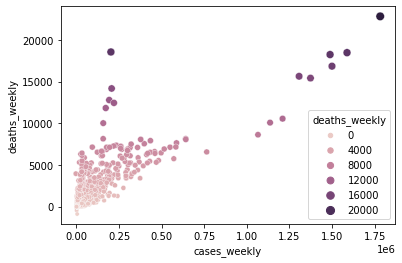

In [ ]:
import seaborn as sns
sns.scatterplot(x="cases_weekly", y="deaths_weekly", 
                hue="deaths_weekly",size="deaths_weekly", data=df)

*Making the index a DateTime Index*

In [ ]:
df['dateRep']=pd.to_datetime(df["dateRep"], dayfirst=True)
df = df.set_index("dateRep")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['year_week', 'cases_weekly', 'deaths_weekly', 'countriesAndTerritories',
       'geoId', 'countryterritoryCode', 'popData2019', 'continentExp',
       'notification_rate_per_100000_population_14-days'],
      dtype='object')


DatetimeIndex(['2021-01-11', '2021-01-04', '2020-12-28', '2020-12-21',
               '2020-12-14', '2020-12-07', '2020-11-30', '2020-11-23',
               '2020-11-16', '2020-11-09',
               ...
               '2020-05-25', '2020-05-18', '2020-05-11', '2020-05-04',
               '2020-04-27', '2020-04-20', '2020-04-13', '2020-04-06',
               '2020-03-30', '2020-03-23'],
              dtype='datetime64[ns]', name='dateRep', length=9791, freq=None)

*Cleaning up the data to not include negative cases/deaths*

In [ ]:

df = df[df['cases_weekly'] >= 0 ]
df = df[df['deaths_weekly'] >= 0 ]
df.sort_values(by=["cases_weekly"], ascending=True)

,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
dateRep,,,,,,,,,
2020-06-01,2020-22,0,0,Faroe_Islands,FO,FRO,48677.0,Europe,0.00
2020-04-13,2020-15,0,0,Bhutan,BT,BTN,763094.0,Asia,0.13
2020-04-20,2020-16,0,0,Bhutan,BT,BTN,763094.0,Asia,0.00
2020-07-27,2020-30,0,0,Grenada,GD,GRD,112002.0,America,0.00
2020-05-04,2020-18,0,0,Bhutan,BT,BTN,763094.0,Asia,0.26
...,...,...,...,...,...,...,...,...,...
2020-12-07,2020-49,1373677,15437,United_States_of_America,US,USA,329064917.0,America,762.79
2021-01-04,2020-53,1488563,18264,United_States_of_America,US,USA,329064917.0,America,849.49
2020-12-14,2020-50,1499756,16867,United_States_of_America,US,USA,329064917.0,America,873.21


In [ ]:
df.index.min()

Timestamp('2020-01-06 00:00:00')

In [ ]:
df.index.max()

Timestamp('2021-01-11 00:00:00')

In [ ]:
df['cases_weekly'].min()

0

*Sort by highest Deaths/Cases to lowest*

In [ ]:
current_df = df.sort_values(by=["deaths_weekly", "cases_weekly"], ascending=False)
current_df.head(10)

,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
dateRep,,,,,,,,,
2021-01-11,2021-01,1782792,22852,United_States_of_America,US,USA,329064917.0,America,994.14
2020-04-20,2020-16,202116,18574,United_States_of_America,US,USA,329064917.0,America,128.26
2020-12-21,2020-51,1588085,18493,United_States_of_America,US,USA,329064917.0,America,938.37
2021-01-04,2020-53,1488563,18264,United_States_of_America,US,USA,329064917.0,America,849.49
2020-12-14,2020-50,1499756,16867,United_States_of_America,US,USA,329064917.0,America,873.21
2020-12-28,2020-52,1306812,15656,United_States_of_America,US,USA,329064917.0,America,879.73
2020-12-07,2020-49,1373677,15437,United_States_of_America,US,USA,329064917.0,America,762.79
2020-04-27,2020-17,206223,14194,United_States_of_America,US,USA,329064917.0,America,124.09
2020-05-04,2020-18,192131,12806,United_States_of_America,US,USA,329064917.0,America,121.06


*New feature of weekly death to case ratio*

In [ ]:
current_df['death_to_case']=current_df['deaths_weekly']/current_df['cases_weekly']

In [ ]:
current_df.head()

,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,death_to_case
dateRep,,,,,,,,,,
2021-01-11,2021-01,1782792,22852,United_States_of_America,US,USA,329064917.0,America,994.14,0.012818
2020-04-20,2020-16,202116,18574,United_States_of_America,US,USA,329064917.0,America,128.26,0.091898
2020-12-21,2020-51,1588085,18493,United_States_of_America,US,USA,329064917.0,America,938.37,0.011645
2021-01-04,2020-53,1488563,18264,United_States_of_America,US,USA,329064917.0,America,849.49,0.012270
2020-12-14,2020-50,1499756,16867,United_States_of_America,US,USA,329064917.0,America,873.21,0.011246


*Copy of DF with only three features*

In [ ]:
gbCountryAndTerr= current_df[['countriesAndTerritories','cases_weekly', 'deaths_weekly']].copy()

In [ ]:
gbCountryAndTerr.head()

,countriesAndTerritories,cases_weekly,deaths_weekly
dateRep,,,
2021-01-11,United_States_of_America,1782792,22852
2020-04-20,United_States_of_America,202116,18574
2020-12-21,United_States_of_America,1588085,18493
2021-01-04,United_States_of_America,1488563,18264
2020-12-14,United_States_of_America,1499756,16867


Group by country to see total number of cases and deaths in that country

In [ ]:
gbCountryAndTerr2=gbCountryAndTerr.groupby(['countriesAndTerritories']).sum()
gbCountryAndTerr2.columns = ['cases', 'deaths']
gbCountryAndTerr2

,cases,deaths
countriesAndTerritories,,
Afghanistan,53584,2301
Albania,63595,1241
Algeria,102144,2807
Andorra,8682,86
Angola,18193,416
...,...,...
Wallis_and_Futuna,4,0
Western_Sahara,766,1
Yemen,2108,612


In [ ]:
gbCountryAndTerr2['death_to_case']=gbCountryAndTerr2['deaths']/gbCountryAndTerr2['cases']

In [ ]:
gbCountryAndTerr2

,cases,deaths,death_to_case
countriesAndTerritories,,,
Afghanistan,53584,2301,0.042942
Albania,63595,1241,0.019514
Algeria,102144,2807,0.027481
Andorra,8682,86,0.009906
Angola,18193,416,0.022866
...,...,...,...
Wallis_and_Futuna,4,0,0.000000
Western_Sahara,766,1,0.001305
Yemen,2108,612,0.290323


*Sort from highest death to case ratio to lowest*

In [ ]:
gbCountryAndTerr2 = gbCountryAndTerr2.sort_values(by=["death_to_case"], ascending=False)
gbCountryAndTerr2.head(10)

,cases,deaths,death_to_case
countriesAndTerritories,,,
Yemen,2108,612,0.290323
Mexico,1541633,134368,0.087160
Montserrat,13,1,0.076923
Isle_of_Man,396,25,0.063131
Sudan,23316,1468,0.062961
Syria,12364,774,0.062601
Egypt,149792,8197,0.054723
Bolivia,173896,9376,0.053917
China,96824,4787,0.049440


In [ ]:
gbCountryAndTerr2['C_and_T'] = gbCountryAndTerr2.index

In [ ]:
gbCountryAndTerr3=gbCountryAndTerr2.head()


Barplot of five highest death to case ratio countries compared

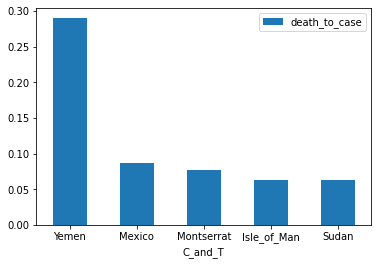

In [ ]:
gbCountryAndTerr3.plot.bar(x='C_and_T', y='death_to_case', rot=0)

In [ ]:
gbCountryAndTerr5=gbCountryAndTerr2.sort_values(by=["cases"], ascending=False)

*Plot of countries with 5 highest cases and the amount of their deaths in proportion. US is leading by a longshot!*

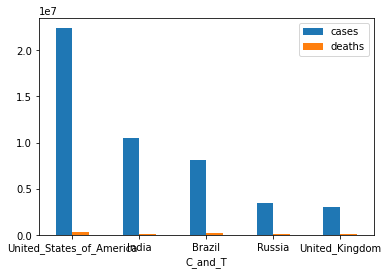

In [ ]:
gbCountryAndTerr5.head().plot.bar(x='C_and_T', y=['cases','deaths'], rot=0)

In [ ]:
ctcd= current_df[['countriesAndTerritories','cases_weekly', 'deaths_weekly']].copy()

In [ ]:
ctcd2=ctcd.groupby(['countriesAndTerritories']).sum()
ctcd2.columns=['cases', 'deaths']
ctcd2

,cases,deaths
countriesAndTerritories,,
Afghanistan,53584,2301
Albania,63595,1241
Algeria,102144,2807
Andorra,8682,86
Angola,18193,416
...,...,...
Wallis_and_Futuna,4,0
Western_Sahara,766,1
Yemen,2108,612


In [ ]:
pop=current_df[['countriesAndTerritories','popData2019']].copy()

In [ ]:
pop2=pop.groupby(['countriesAndTerritories']).mean()
pop2

,popData2019
countriesAndTerritories,
Afghanistan,38041757.0
Albania,2862427.0
Algeria,43053054.0
Andorra,76177.0
Angola,31825299.0
...,...
Wallis_and_Futuna,NaN
Western_Sahara,582458.0
Yemen,29161922.0


In [ ]:
countryData=pd.merge(ctcd2, pop2, left_index=True, right_index=True)

*Adding features of cases per million and deaths per million*

In [ ]:
countryData["casesPerMill"]=countryData['cases']/(countryData['popData2019']/1000000)

In [ ]:
countryData["deathsPerMill"]=countryData['deaths']/(countryData['popData2019']/1000000)

In [ ]:
countryData

,cases,deaths,popData2019,casesPerMill,deathsPerMill
countriesAndTerritories,,,,,
Afghanistan,53584,2301,38041757.0,1408.557444,60.486165
Albania,63595,1241,2862427.0,22217.160473,433.548174
Algeria,102144,2807,43053054.0,2372.514619,65.198627
Andorra,8682,86,76177.0,113971.408693,1128.949683
Angola,18193,416,31825299.0,571.652131,13.071362
...,...,...,...,...,...
Wallis_and_Futuna,4,0,NaN,NaN,NaN
Western_Sahara,766,1,582458.0,1315.116283,1.716862
Yemen,2108,612,29161922.0,72.286045,20.986271


In [ ]:
countryData.sort_values(by=["casesPerMill"], ascending=False).head()

,cases,deaths,popData2019,casesPerMill,deathsPerMill
countriesAndTerritories,,,,,
Andorra,8682,86,76177.0,113971.408693,1128.949683
Gibraltar,3170,16,33706.0,94048.537352,474.692933
Montenegro,52431,725,622182.0,84269.554568,1165.253897
Luxembourg,49063,533,613894.0,79920.963554,868.228065
Czechia,835454,13272,10649800.0,78447.858176,1246.220586


In [ ]:
countryData.sort_values(by=["deathsPerMill"], ascending=False).head()

,cases,deaths,popData2019,casesPerMill,deathsPerMill
countriesAndTerritories,,,,,
San_Marino,2667,64,34453.0,77409.804661,1857.603111
Belgium,665984,20142,11455519.0,58136.519175,1758.279132
Slovenia,139713,3147,2080908.0,67140.402171,1512.320583
Bosnia_and_Herzegovina,115758,4358,3300998.0,35067.576533,1320.206798
Italy,2276491,78755,60359546.0,37715.508993,1304.764618


In [ ]:
x=df[['cases_weekly', 'deaths_weekly']].copy().groupby('dateRep').sum()


In [ ]:
df.index.max()

Timestamp('2021-01-11 00:00:00')

*Plot of cases and deaths by time.*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9a502630>,
      dtype=object)

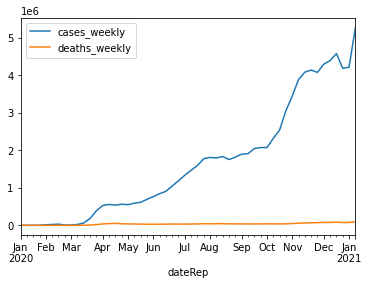

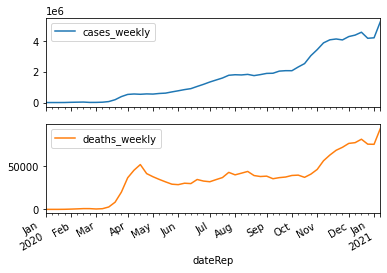

In [ ]:
x.plot()
x.plot(subplots=True)


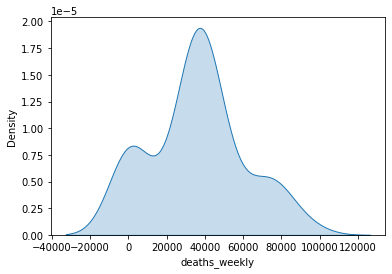

In [ ]:
sns.kdeplot(x["deaths_weekly"], shade=True)


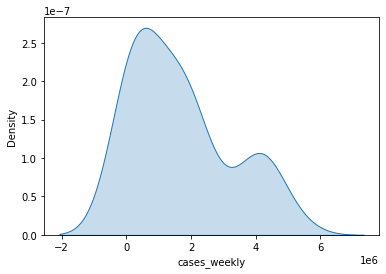

In [ ]:
sns.kdeplot(x["cases_weekly"], shade=True)


List of top ten countries with highest amount of deaths.

In [ ]:
countryDataSorted=countryData.sort_values(by=["deaths", "cases"], ascending=False)
countryDataSorted['countryTerritoryName']=countryDataSorted.index
top_ten_countries = list(countryDataSorted["countryTerritoryName"].head(10).values)
top_ten_countries

['United_States_of_America',
 'Brazil',
 'India',
 'Mexico',
 'United_Kingdom',
 'Italy',
 'France',
 'Russia',
 'Iran',
 'Spain']

In [ ]:
countryDataSorted

,cases,deaths,popData2019,casesPerMill,deathsPerMill,countryTerritoryName
countriesAndTerritories,,,,,,
United_States_of_America,22423006,374442,3.290649e+08,68141.588002,1137.897055,United_States_of_America
Brazil,8131612,203580,2.110495e+08,38529.403140,964.607742,Brazil
India,10466595,151160,1.366418e+09,7659.879238,110.625026,India
Mexico,1541633,134368,1.275755e+08,12084.080796,1053.242742,Mexico
United_Kingdom,3072349,81431,6.664711e+07,46098.756687,1221.823385,United_Kingdom
...,...,...,...,...,...,...
Anguilla,15,0,1.487200e+04,1008.606778,0.000000,Anguilla
Marshall_Islands,4,0,5.879100e+04,68.037625,0.000000,Marshall_Islands
Wallis_and_Futuna,4,0,NaN,NaN,NaN,Wallis_and_Futuna


In [ ]:
top_countries_df = df[df['countriesAndTerritories'].isin(top_ten_countries)]


In [ ]:
top_countries_df

,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
dateRep,,,,,,,,,
2021-01-11,2021-01,397866,7562,Brazil,BR,BRA,211049519.0,America,306.72
2021-01-04,2020-53,249461,4879,Brazil,BR,BRA,211049519.0,America,222.76
2020-12-28,2020-52,220666,3848,Brazil,BR,BRA,211049519.0,America,275.92
2020-12-21,2020-51,361667,5889,Brazil,BR,BRA,211049519.0,America,312.76
2020-12-14,2020-50,298412,4461,Brazil,BR,BRA,211049519.0,America,278.23
...,...,...,...,...,...,...,...,...,...
2020-02-03,2020-05,6,0,United_States_of_America,US,USA,329064917.0,America,0.00
2020-01-27,2020-04,5,0,United_States_of_America,US,USA,329064917.0,America,0.00
2020-01-20,2020-03,0,0,United_States_of_America,US,USA,329064917.0,America,0.00


*Graphs of top ten countries' cases compared to deaths per week.*

<Figure size 1080x360 with 0 Axes>

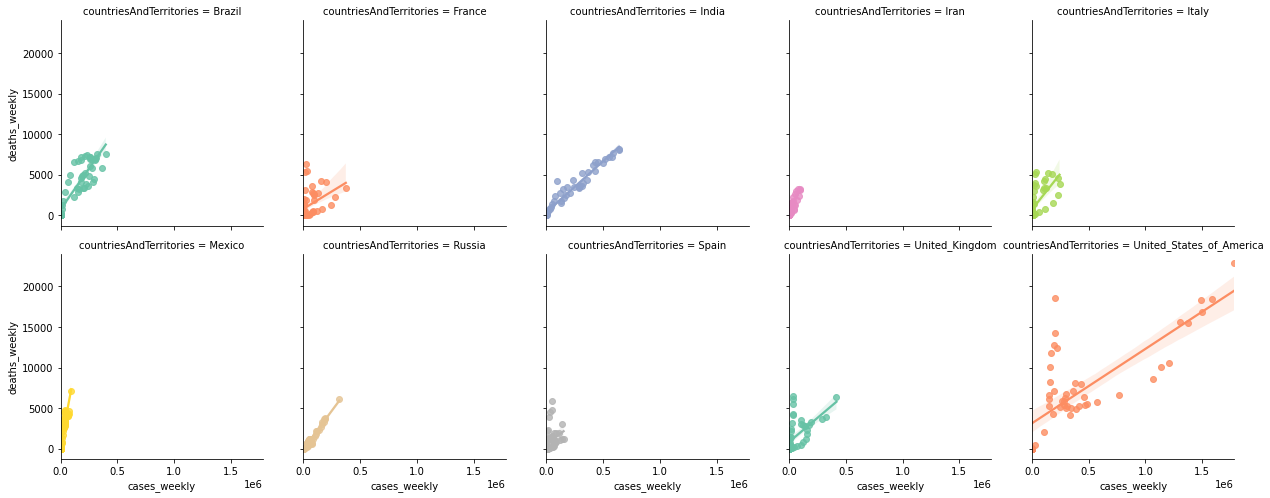

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases_weekly", y="deaths_weekly",
                    height=3.5,
                    col="countriesAndTerritories",
                    col_wrap=5,
                    hue="countriesAndTerritories", 
                    palette="Set2",
                    data=top_countries_df)
ax.fig.subplots_adjust(wspace=.2)

*Setting up cases_weekly data for minmax scaling*

In [ ]:
minmaxdata=df[['cases_weekly']].copy()

In [ ]:
minmaxdata['cases_weekly']

dateRep
2021-01-11     675
2021-01-04     902
2020-12-28    1994
2020-12-21     740
2020-12-14    1757
              ... 
2020-04-20      11
2020-04-13       5
2020-04-06       2
2020-03-30       5
2020-03-23       2
Name: cases_weekly, Length: 9782, dtype: int64

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy

In [ ]:
from sklearn.preprocessing import StandardScaler

*Minmax scaling cases_weekly and deaths_weekly to compare*

In [ ]:
minmaxscale2=np.asarray(df[['cases_weekly','deaths_weekly']])

In [ ]:
print(minmaxscale2.astype(float))

[[6.750e+02 7.100e+01]
 [9.020e+02 6.000e+01]
 [1.994e+03 8.800e+01]
 ...
 [2.000e+00 0.000e+00]
 [5.000e+00 1.000e+00]
 [2.000e+00 0.000e+00]]


In [ ]:
mms2=MinMaxScaler().fit_transform(minmaxscale2)
mms2

array([[3.78619603e-04, 3.10694906e-03],
       [5.05947974e-04, 2.62559076e-03],
       [1.11847035e-03, 3.85086644e-03],
       ...,
       [1.12183586e-06, 0.00000000e+00],
       [2.80458965e-06, 4.37598460e-05],
       [1.12183586e-06, 0.00000000e+00]])

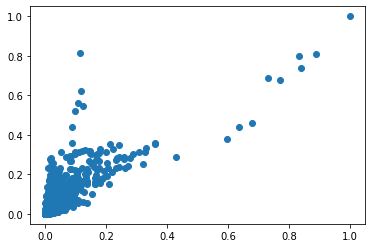

In [ ]:
plt.scatter(mms2[:,0],mms2[:,1])

X=cases_weekly, Y=deaths_weekly

*Standard scaling both cases_weekly and deaths_weekly for comparison*

In [ ]:
ss2=StandardScaler().fit_transform(minmaxscale2)
ss2

array([[-0.15285398, -0.13723546],
       [-0.14877446, -0.14911213],
       [-0.12914961, -0.11888061],
       ...,
       [-0.16494879, -0.21389397],
       [-0.16489487, -0.21281427],
       [-0.16494879, -0.21389397]])

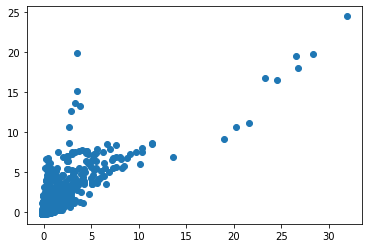

In [ ]:
plt.scatter(ss2[:,0],ss2[:,1])

X=cases_weekly, Y=deaths_weekly

##Conclusion

After exploring and analyzing such data, as well as cleaning up come errors such as the negative amounts of cases_weekly and deaths_weekly for some countries, we are able to compare the spread and handling of COVID-19 around various countries in the world. We are able to see where the virus has had the most impact and which have handled the spread the worst. We can see how and to what extent some countries, that could have even been better developed than others, may have handled the issue in an even worse matter. We may also see how poor countries, such as Yemen, have had significantly high case to death ratios. That can allow us to analyze the issue further and see the reasons as to why this was, such as poor living conditions overall, many people with underlying health conditions, and of course inability to work from home just as many agricultural and factory jobs may be. Another factor is of course misinformation, distrust in the government and overall carelessness and selfishness that may have spread the virus to such high extents in many developed and relatively rich countries like the United States. We can ask, why was there so much distrust in the government, why was the handling of such an issue so poor, why was there shortages of medical supplies and so on. Using machine learning, we may also then determine, had a new case popped up, and given it was in a specific country, what would be the survival rate of one with an infection. We can also see that if a new case were to pop up, what are the highest probable countries it would be in, or at least in which continents. Also, you can see if such data was to be reported, and given the country and its latest notification data per one hundred thousand, how likely is it that it would be reported, so that you may see how seriously it is taken in that country, and how much people would care to alert others and perhaps even stay away if they had gotten the virus.  